# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [10]:
# Performing a weather check on city using a series of API calls:

# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
      
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(2)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | karwar
Processing Record 3 of Set 1 | yeppoon
Processing Record 4 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | roches noires
City not found. Skipping...
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | tiarei
Processing Record 10 of Set 1 | lorengau
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | baker
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | shu
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | namib

Processing Record 38 of Set 4 | semey
Processing Record 39 of Set 4 | sulangan
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | sirnak
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | honiara
Processing Record 44 of Set 4 | macas
Processing Record 45 of Set 4 | port hawkesbury
Processing Record 46 of Set 4 | lagos
Processing Record 47 of Set 4 | humberto de campos
Processing Record 48 of Set 4 | mao
Processing Record 49 of Set 4 | shiyan
Processing Record 0 of Set 5 | bilibino
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | nuuk
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | salzgitter
Processing Record 5 of Set 5 | kingussie
Processing Record 6 of Set 5 | guerrero
Processing Record 7 of Set 5 | halalo
City not found. Skipping...
Processing Record 8 of Set 5 | deputatskiy
Processing Record 9 of Set 5 | dukat
Processing Record 10 of Set 5 | isange

Processing Record 28 of Set 8 | soyo
Processing Record 29 of Set 8 | puerto baquerizo moreno
Processing Record 30 of Set 8 | mungwi
Processing Record 31 of Set 8 | grand gaube
Processing Record 32 of Set 8 | riachao das neves
Processing Record 33 of Set 8 | saleaula
City not found. Skipping...
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | channel-port aux basques
Processing Record 37 of Set 8 | qaqortoq
Processing Record 38 of Set 8 | andijon
Processing Record 39 of Set 8 | cotonou
Processing Record 40 of Set 8 | kosh-agach
Processing Record 41 of Set 8 | kamaishi
Processing Record 42 of Set 8 | ortona
Processing Record 43 of Set 8 | don benito
Processing Record 44 of Set 8 | yerbogachen
Processing Record 45 of Set 8 | san matias
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | chernyshevskiy
Processing Record 48 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 49 of Set

Processing Record 17 of Set 12 | bagar
Processing Record 18 of Set 12 | aklavik
Processing Record 19 of Set 12 | berdigestyakh
Processing Record 20 of Set 12 | juifang
City not found. Skipping...
Processing Record 21 of Set 12 | sumenep
Processing Record 22 of Set 12 | kalulushi
Processing Record 23 of Set 12 | roma
Processing Record 24 of Set 12 | ahvaz
Processing Record 25 of Set 12 | smestad
Processing Record 26 of Set 12 | abha
Processing Record 27 of Set 12 | pangnirtung
Processing Record 28 of Set 12 | luangwa
Processing Record 29 of Set 12 | yar-sale
Processing Record 30 of Set 12 | port arthur
Processing Record 31 of Set 12 | lafiagi
Processing Record 32 of Set 12 | katobu
Processing Record 33 of Set 12 | punta gorda
Processing Record 34 of Set 12 | batagay-alyta
Processing Record 35 of Set 12 | mount darwin
Processing Record 36 of Set 12 | balkhash
Processing Record 37 of Set 12 | matsanga
City not found. Skipping...
Processing Record 38 of Set 12 | sur
Processing Record 39 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [19]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.05,92,100,20.42,AU,1622218874
1,Karwar,14.8000,74.1333,81.77,78,19,6.06,IN,1622218877
2,Yeppoon,-23.1333,150.7333,49.78,50,25,7.29,AU,1622218594
3,New Norfolk,-42.7826,147.0587,45.90,67,22,1.99,AU,1622218882
4,Longyearbyen,78.2186,15.6401,31.84,59,0,17.27,SJ,1622218884


In [21]:
# Exporting the city data to .csv file:

weather_df.to_csv("../weather_df.csv", index=False, header=True)

In [22]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.550568,21.017186,67.249345,65.414545,53.207273,8.573309,1.622220e+09
std,33.195889,89.265437,17.916669,23.053414,37.223109,6.221181,3.802791e+02
min,-54.800000,-175.200000,24.800000,3.000000,0.000000,0.000000,1.622219e+09
25%,-8.168250,-58.715150,53.542500,51.000000,19.000000,3.922500,1.622219e+09
50%,21.443950,24.715000,69.800000,70.000000,59.000000,7.180000,1.622220e+09
75%,47.937525,100.053275,81.000000,84.000000,90.000000,11.555000,1.622220e+09
max,78.218600,179.316700,113.310000,100.000000,100.000000,48.470000,1.622220e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.05,92,100,20.42,AU,1622218874
1,Karwar,14.8000,74.1333,81.77,78,19,6.06,IN,1622218877
2,Yeppoon,-23.1333,150.7333,49.78,50,25,7.29,AU,1622218594
3,New Norfolk,-42.7826,147.0587,45.90,67,22,1.99,AU,1622218882
4,Longyearbyen,78.2186,15.6401,31.84,59,0,17.27,SJ,1622218884


In [24]:
# Inspecting the data for cities where the humidity > 100%: 

weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()

6

In [26]:
# Filtered data by humidity:
filtered_df = weather_df.loc[weather_df['Humidity'] < 100]

In [27]:
len(filtered_df)

544

In [28]:
# Checking the weather_df and comparing it to the filtered_df:
len(weather_df)

550

In [29]:
filtered_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.811865,21.734900,67.328456,65.033088,52.829044,8.576434,1.622220e+09
std,33.030509,88.844293,17.945192,22.890379,37.229098,6.192372,3.797524e+02
min,-53.150000,-173.300000,24.800000,3.000000,0.000000,0.000000,1.622219e+09
25%,-7.862000,-58.627400,53.377500,51.000000,18.750000,3.975000,1.622219e+09
50%,21.768200,24.730700,69.925000,70.000000,57.500000,7.205000,1.622220e+09
75%,48.016700,100.290250,81.050000,84.000000,90.000000,11.545000,1.622220e+09
max,78.218600,179.316700,113.310000,99.000000,100.000000,48.470000,1.622220e+09


In [30]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
for x in over_100:
    clean_city_data = weather_df.drop([x])
clean_city_data    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.05,92,100,20.42,AU,1622218874
1,Karwar,14.8000,74.1333,81.77,78,19,6.06,IN,1622218877
2,Yeppoon,-23.1333,150.7333,49.78,50,25,7.29,AU,1622218594
3,New Norfolk,-42.7826,147.0587,45.90,67,22,1.99,AU,1622218882
4,Longyearbyen,78.2186,15.6401,31.84,59,0,17.27,SJ,1622218884
...,...,...,...,...,...,...,...,...,...
545,Sur,22.5667,59.5289,88.29,43,0,9.84,OM,1622220170
546,Bowen,-20.0167,148.2333,48.42,49,0,8.23,AU,1622220172
547,Aksarka,66.5606,67.7975,44.67,43,90,6.82,RU,1622220174
548,Kulykivka,51.3735,31.6466,65.57,81,92,1.57,UA,1622220177


In [33]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("../clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

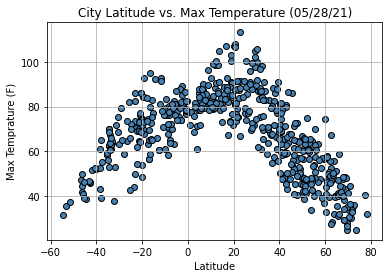

In [36]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

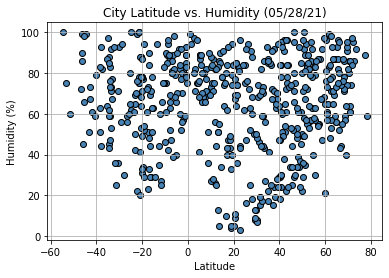

In [38]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

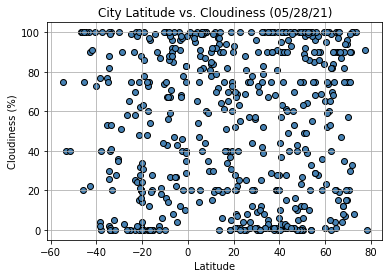

In [39]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

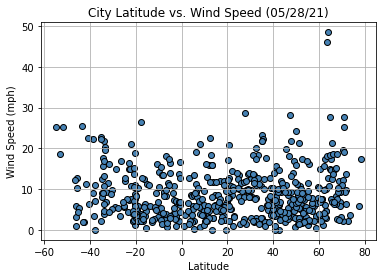

In [40]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../lat_vs_wind.png")
plt.show()

## Linear Regression

In [42]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 6.378292859962811e-90
The r-value is: -0.8161706629115285


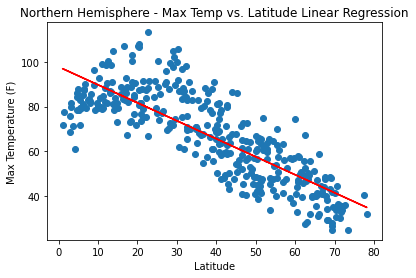

In [44]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../north_temp_lg.png")
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 2.468925715775299e-32
The r-value is: 0.7402165595109877


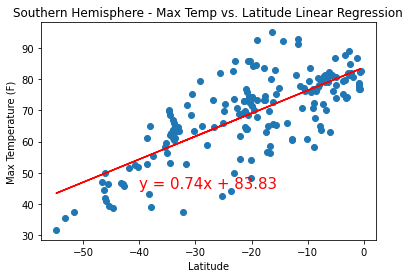

In [45]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../south_temp_lg.png")
plt.show()

## After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

***
## First pair:
### Comparing the linear regression of temperatures at changing latitudes in the northern vs southern hemisphere:

> The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.  
***

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.02515746152855664
The r-value is: 0.11623980340835721


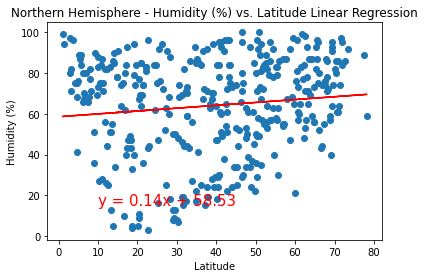

In [47]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../north_humidity_lg.png")
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.8598677697247152
The r-value is: 0.013287915059648828


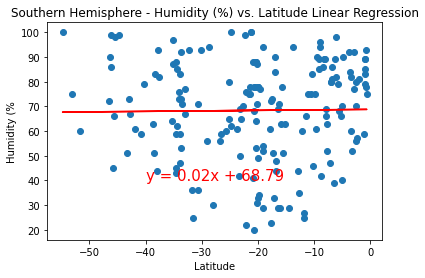

In [49]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../south_humidity_lg.png")
plt.show()

***
## Second pair:
### Comparing the linear regression of humidity at changing latitudes in the northern vs southern hemisphere:

> The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. 
As latitude increases in the northern hemisphere so does humidity, which means there is a positive correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere. 
***



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.9428284153182144
The r-value is: -0.0037358708063458795


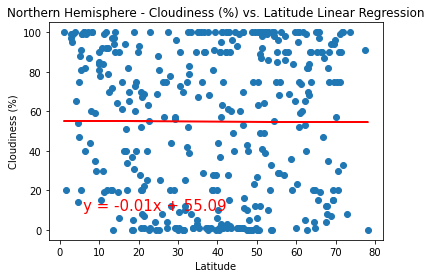

In [50]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../north_cloud_lg.png")
plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.9766437366276466
The r-value is: -0.0022036955102807607


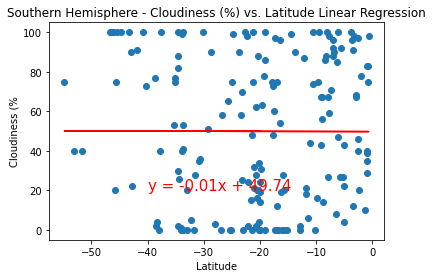

In [51]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../south_cloud_lg.png")
plt.show()

***
## Third pair:
### Comparing the linear regression of cloudiness at changing latitudes in the northern vs southern hemisphere:
> The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is significant positive relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.
***

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.00615551341643347
The r-value is: 0.14197949262263473


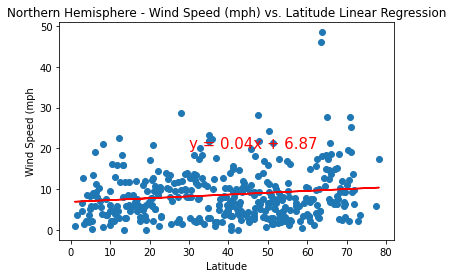

In [53]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("./north_wind_lg.png")
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.00011073005555745155
The r-value is: -0.2849264883522041


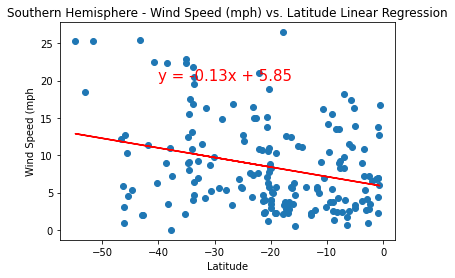

In [54]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../south_wind_lg.png")
plt.show() 

***
## Forth pair:
### Comparing the linear regression of wind speed at changing latitudes in the northern vs southern hemisphere:
> The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed. 
***

## Written description of three observable trends based on the data:
>* For regions that are close to the equator there is a trend of increased temperature for both the northern and southern hemispheres. This is reasonable given the progressive distance from the equator both north and south, respectively.   
>* Across both the northern and southern hemispheres humidity is mostly over 60%, and it trends opposite to temperature, which is accurate given relative humidity increases with decreasing temperature.  
>* For both hemispheres wind speed was generally below 20 miles per hour irrespective of latitude. This appears reasonable given wind speed is determined by pressure differentials across regions and not latitutde. 
>* Cloudiness across both hemispheres was variable and displayed no pattern based on latitude, this is similar to wind speed. 
****